In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [53]:
def generate_connected_bitmap():
    # Start with an all-white 8x8 bitmap
    bitmap = np.ones((8, 8), dtype=int)

    # List of offsets representing the 8 neighboring cells around a point
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Start with a random black pixel
    start_x, start_y = np.random.randint(0, 8, 2)
    bitmap[start_x, start_y] = 0

    # Number of black pixels to add, randomly chosen
    num_black_pixels = np.random.randint(1, 15)  # You can adjust this range

    for _ in range(num_black_pixels):
        # Find all black pixels
        black_pixels = np.argwhere(bitmap == 0)

        # Randomly select a black pixel
        black_pixel = random.choice(black_pixels)

        # Generate a list of potential positions for a new black pixel
        potential_positions = [(black_pixel[0] + dx, black_pixel[1] + dy) for dx, dy in neighbors]
        random.shuffle(potential_positions)

        # Place a new black pixel in a valid neighboring position
        for x, y in potential_positions:
            if 0 <= x < 8 and 0 <= y < 8 and bitmap[x, y] == 1:
                bitmap[x, y] = 0
                break

    plt.imshow(bitmap)
    plt.axis('off')
    plt.show()

    return bitmap

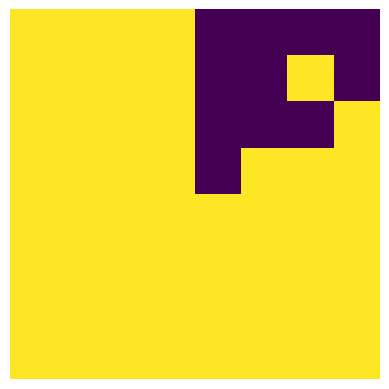

array([[1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [54]:
generate_connected_bitmap()

The bitmap above will be our "universe".
We want to proceed as follows:

1. Let as many cells "spawn in" as necessary (i.e., we want as many cells as there are black pixels)
2. Coordinate their actions so that they eventually get into the right formation.

Simple to state, not so simply to carry out...

## Agent

In [ ]:
class Agent:
    def __init__(self, initial_position):
        self.position = initial_position
        self.neighborhood = None  # To store the state of neighboring cells

    def perceive_environment(self, local_area):
        # Update the neighborhood state
        # This should be called by the environment to provide the latest local area information
        self.neighborhood = local_area

    def decide_action(self):
        # Decide the next action based on the current state of the neighborhood
        # This can be implemented using an RL policy
        # Returns one of the 9 possible actions (including staying still)
        pass

    def move(self, action):
        # Update the position based on the action
        # This would be a move to one of the 8 neighboring cells or staying still
        self.position = action  # Simplified, assumes 'action' is the new position
